In [1]:
import sys
sys.path.append('..')
from nn import *
from viz import plot_history
from tools import train_test_split

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist01 = np.load('datasets/mnist01.npz')
X, y= mnist01['X'], mnist01['y']

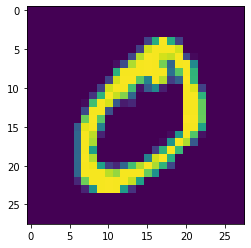

In [4]:
plt.imshow(X[0]);

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train = (X_train.astype(np.float32) / 255.0)
X_test = ( X_test.astype(np.float32) / 255.0)

In [6]:
mod = NeuralNetwork(loss='binary_crossentropy', optimizer='adam', verbose=True, verbose_step=1)
mod.add(Flatten())
mod.add(Dense(769, activation='relu'))
mod.add(Dropout(.5))
mod.add(Dense(789, activation='relu'))
mod.add(Dropout(.5))
mod.add(Dense(1, activation='sigmoid'))
h = mod.fit(X_train, y_train, X_test, y_test, n_epochs=10, batch_size=32, metrics=['accuracy'])
plot_history(h)

../activations.py:62: RuntimeWarning: overflow encountered in exp
  return np.where(X >= 0, 1 / ((1 + np.exp(-X)) + self.bias), np.exp(X) / (1 + np.exp(X)))
../activations.py:62: RuntimeWarning: invalid value encountered in true_divide
  return np.where(X >= 0, 1 / ((1 + np.exp(-X)) + self.bias), np.exp(X) / (1 + np.exp(X)))


[    1/10]: loss=14.65625 val_loss=14.83000 accuracy=0.46957 val_accuracy=0.46321 
[    2/10]: loss=0.37673 val_loss=0.48422 accuracy=0.98621 val_accuracy=0.98232 
[    3/10]: loss=1.35566 val_loss=1.35232 accuracy=0.95094 val_accuracy=0.95106 


KeyboardInterrupt: 

In [ ]:
mod.summary()